In [1]:
'''Task 1: Exploratory Data Analysis (EDA):
1. Load the dataset and perform basic data exploration.'''

'Task 1: Exploratory Data Analysis (EDA):\n1. Load the dataset and perform basic data exploration.'

In [25]:
# Step 1: Import required libraries
import os
os.environ["OMP_NUM_THREADS"] = "1" 

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 2: Load the dataset
df = pd.read_csv("wine.csv")

# Step 3: Display basic information
print("Dataset Shape:", df.shape)       # Rows and columns
print("\nFirst 5 Rows:\n", df.head())   # Preview the first few rows

# Step 4: Summary info about data types and missing values
print("\nData Types and Missing Values:\n")
print(df.info())

# Step 5: Statistical summary of numeric features
print("\nSummary Statistics:\n")
print(df.describe())

# Step 6: Check for missing values
print("\nMissing Values Count:\n")
print(df.isnull().sum())

# Step 7 (optional): Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Step 8 (optional): Show column names
print("\nColumn Names:\n", df.columns.tolist())


Dataset Shape: (178, 14)

First 5 Rows:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Data Types and Missing Values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 e

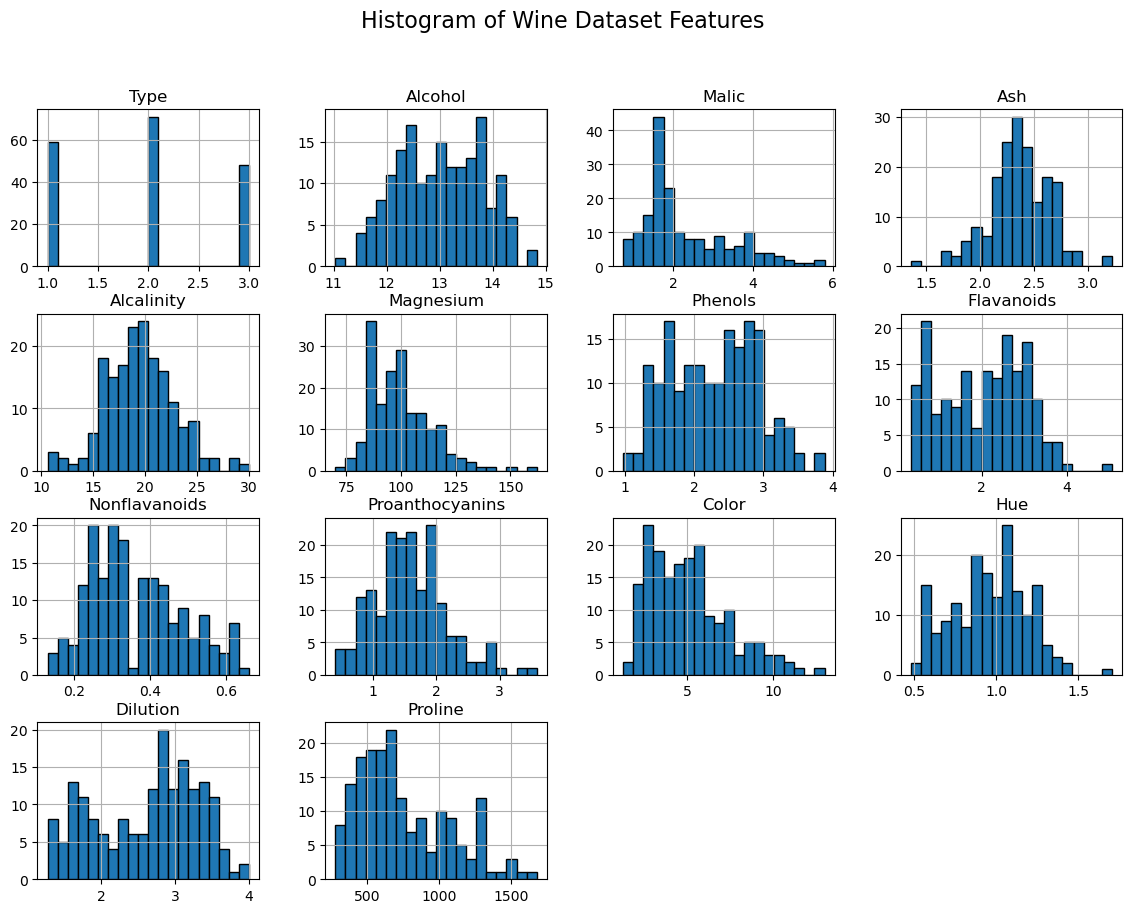

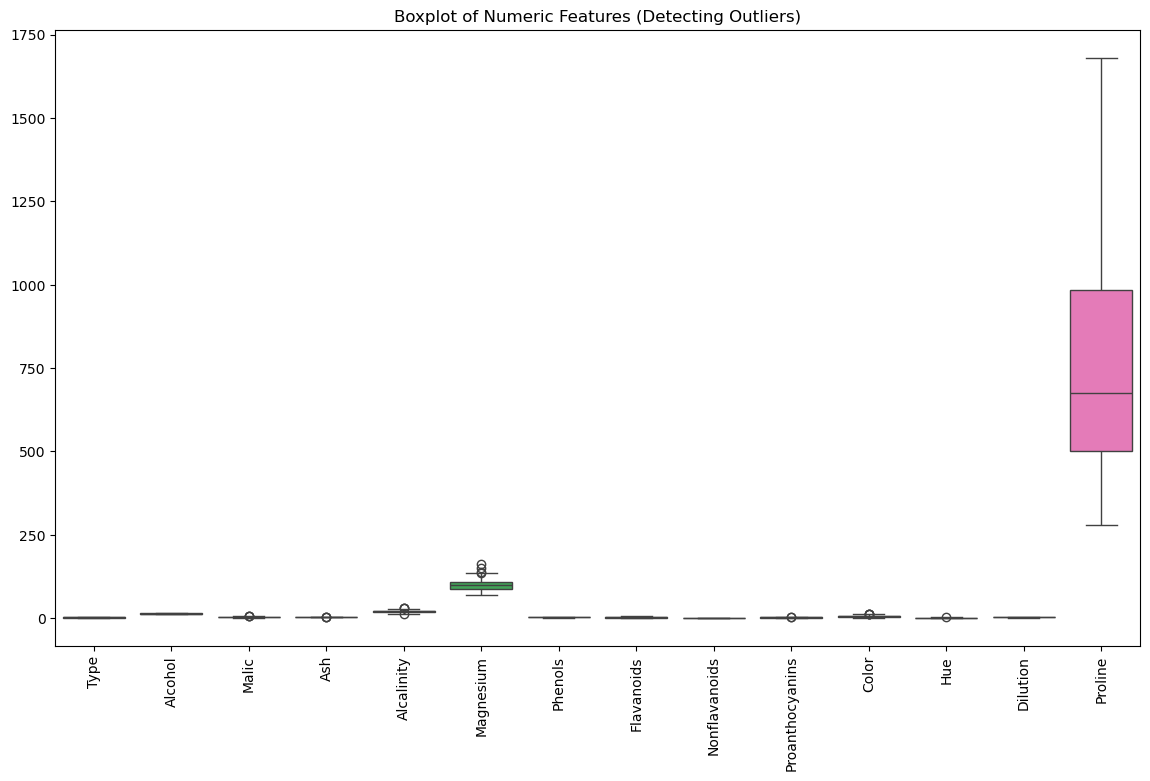

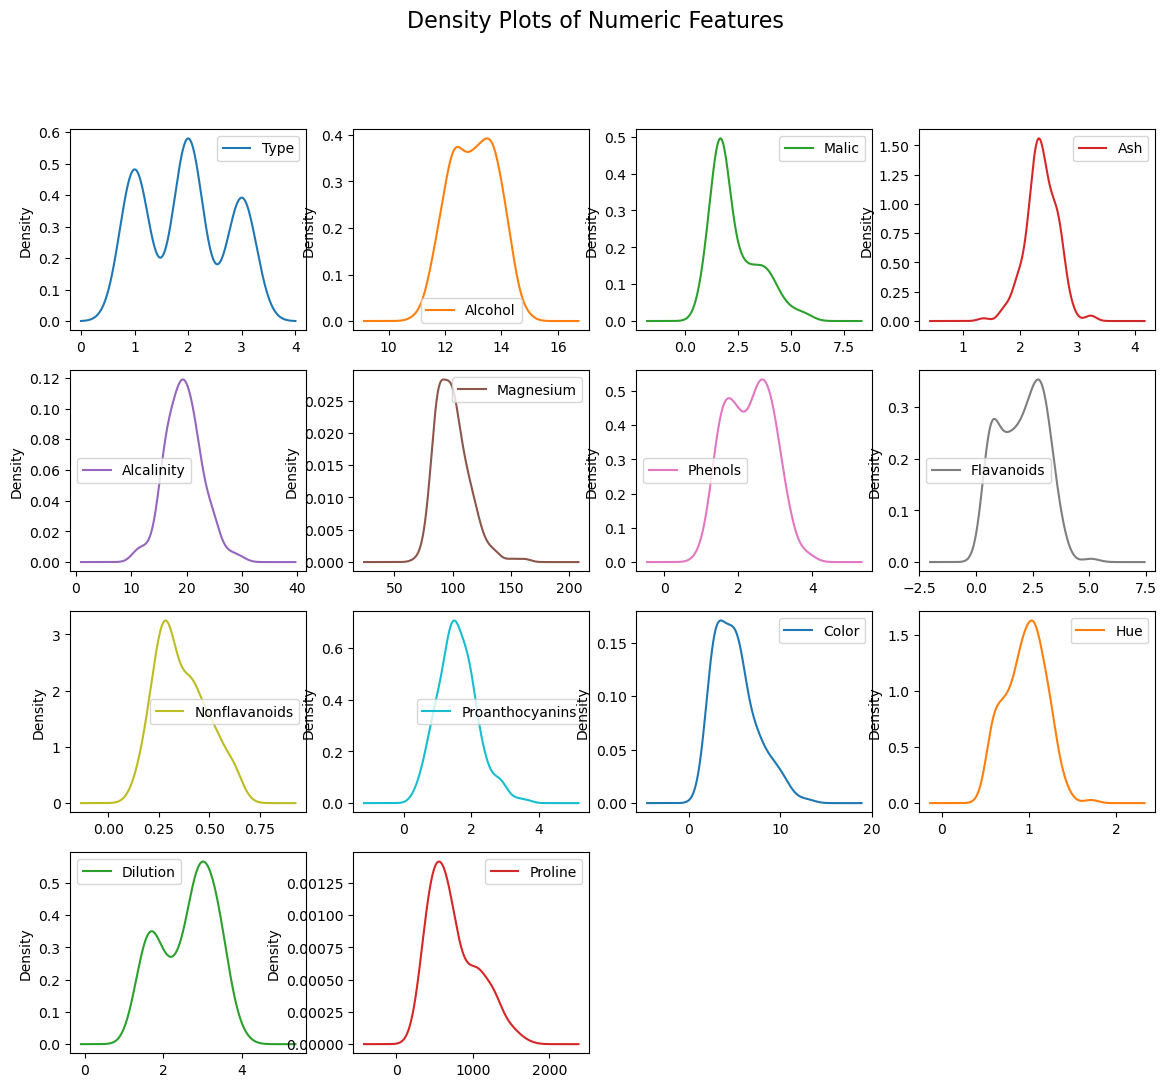

In [26]:
# 2.Examine the distribution of features using histograms, box plots, or density plots.
#--------------------------------------------------------------------------------------------------------------------
# Select only numeric features
numeric_df = df.select_dtypes(include=['number'])

# 1️⃣ Histograms for all numeric features
numeric_df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histogram of Wine Dataset Features", fontsize=16)
plt.show()

# 2️⃣ Boxplots for all numeric features (to detect outliers)
plt.figure(figsize=(14, 8))
sns.boxplot(data=numeric_df)
plt.title("Boxplot of Numeric Features (Detecting Outliers)")
plt.xticks(rotation=90)
plt.show()

# 3️⃣ Density plots (Kernel Density Estimate - KDE)
numeric_df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(14, 12))
plt.suptitle("Density Plots of Numeric Features", fontsize=16)
plt.show()

In [27]:
'''Histogram
Shows the frequency distribution of each feature
Detects skewness, symmetry, or multimodal distributions

Boxplot
Visualizes median, quartiles, and potential outliers
Quickly identifies extreme values

Density Plot (KDE)
Smooth version of histogram
Highlights the shape of the distribution (normal, skewed, etc.)'''

'Histogram\nShows the frequency distribution of each feature\nDetects skewness, symmetry, or multimodal distributions\n\nBoxplot\nVisualizes median, quartiles, and potential outliers\nQuickly identifies extreme values\n\nDensity Plot (KDE)\nSmooth version of histogram\nHighlights the shape of the distribution (normal, skewed, etc.)'

Correlation Matrix:

                 Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  \
Type             1.00    -0.33   0.44 -0.05        0.52      -0.21    -0.72   
Alcohol         -0.33     1.00   0.09  0.21       -0.31       0.27     0.29   
Malic            0.44     0.09   1.00  0.16        0.29      -0.05    -0.34   
Ash             -0.05     0.21   0.16  1.00        0.44       0.29     0.13   
Alcalinity       0.52    -0.31   0.29  0.44        1.00      -0.08    -0.32   
Magnesium       -0.21     0.27  -0.05  0.29       -0.08       1.00     0.21   
Phenols         -0.72     0.29  -0.34  0.13       -0.32       0.21     1.00   
Flavanoids      -0.85     0.24  -0.41  0.12       -0.35       0.20     0.86   
Nonflavanoids    0.49    -0.16   0.29  0.19        0.36      -0.26    -0.45   
Proanthocyanins -0.50     0.14  -0.22  0.01       -0.20       0.24     0.61   
Color            0.27     0.55   0.25  0.26        0.02       0.20    -0.06   
Hue             -0.62    -0.07 

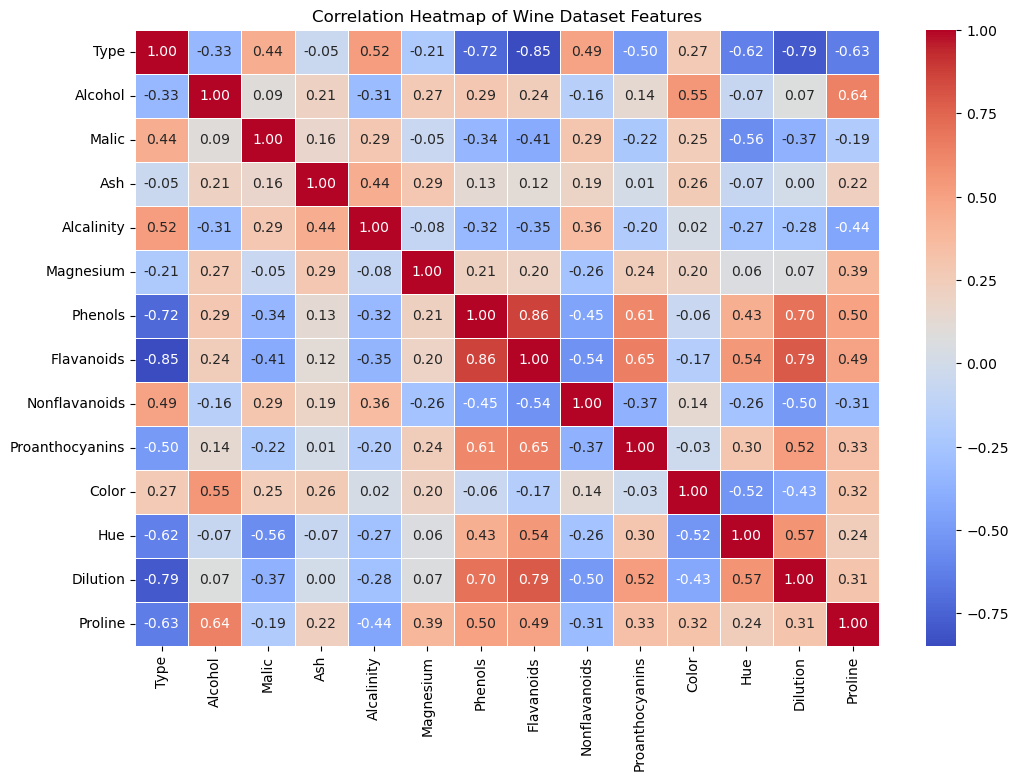


Highly Correlated Feature Pairs (|r| > 0.75):
Type ↔ ['Flavanoids', 'Dilution']
Phenols ↔ ['Flavanoids']
Flavanoids ↔ ['Type', 'Phenols', 'Dilution']
Dilution ↔ ['Type', 'Flavanoids']


In [28]:
#3.	Investigate correlations between features to understand relationships within the data.
#---------------------------------------------------------------------------------------------------------------------------------------\

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:\n")
print(corr_matrix.round(2))

# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Wine Dataset Features")
plt.show()

#(Optional) Highlight highly correlated feature pairs
threshold = 0.75  # choose a threshold
high_corr = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1.0)]
print("\nHighly Correlated Feature Pairs (|r| > 0.75):")
for col in high_corr.columns:
    correlated_features = high_corr.index[high_corr[col].notnull()].tolist()
    if correlated_features:
        print(f"{col} ↔ {correlated_features}")

In [29]:
'''Compute correlation matrix
Measures linear relationships between numeric features
Helps identify which variables move together

Heatmap
Visualizes correlations with colors (red = positive, blue = negative)
Quick overview of strong and weak relationships

Threshold filter 
Finds pairs with correlation above a chosen limit
Identifies redundant features that may need removal'''

'Compute correlation matrix\nMeasures linear relationships between numeric features\nHelps identify which variables move together\n\nHeatmap\nVisualizes correlations with colors (red = positive, blue = negative)\nQuick overview of strong and weak relationships\n\nThreshold filter \nFinds pairs with correlation above a chosen limit\nIdentifies redundant features that may need removal'

Explained Variance Ratio for Each Component:
PC1: 0.3954
PC2: 0.1784
PC3: 0.1033
PC4: 0.0663
PC5: 0.0627
PC6: 0.0481
PC7: 0.0396
PC8: 0.0250
PC9: 0.0210
PC10: 0.0187
PC11: 0.0161
PC12: 0.0121
PC13: 0.0093
PC14: 0.0041


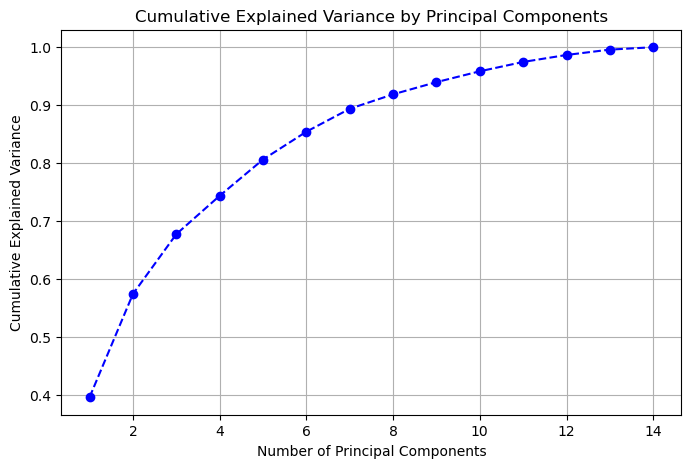


Number of components explaining ~95% variance: 10

Reduced Data (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   

        PC8       PC9      PC10  
0 -0.055637 -0.458765 -1.065570  
1 -1.010372  0.218806  0.020182  
2  0.268957  1.222769  0.106249  
3 -0.618844 -0.114658 -0.107671  
4 -0.434937 -0.261548 -0.112434  


In [30]:
'''Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.'''
#----------------------------------------------------------------------------------------------------------------------------------------------
# Step: Standardize the features (mean=0, std=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step : Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Step : Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_data, 
                      columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Step : Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Print explained variance
print("Explained Variance Ratio for Each Component:")
for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var:.4f}")

# Step : Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--', color='b')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Step : Optional – Select top components that explain ~95% variance
n_components = sum(cumulative_var < 0.95) + 1
print(f"\nNumber of components explaining ~95% variance: {n_components}")

# Step : Transform data to reduced dimensions
pca_reduced = PCA(n_components=n_components)
reduced_data = pca_reduced.fit_transform(scaled_data)
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])

print("\nReduced Data (first 5 rows):")
print(reduced_df.head())

In [31]:
'''
1–2- Load and select numeric features  PCA works only on numeric data                                 
3  - Standardize data                  Ensures all features contribute equally (mean = 0, std = 1)    
4–5- Fit PCA                           Finds principal components (PCs) that capture maximum variance 
6–7- Analyze explained variance        Shows how much information each PC retains                     
8–9- Choose components & reduce        Keeps top PCs explaining ~95% of total variance                '''


'\n1–2- Load and select numeric features  PCA works only on numeric data                                 \n3  - Standardize data                  Ensures all features contribute equally (mean = 0, std = 1)    \n4–5- Fit PCA                           Finds principal components (PCs) that capture maximum variance \n6–7- Analyze explained variance        Shows how much information each PC retains                     \n8–9- Choose components & reduce        Keeps top PCs explaining ~95% of total variance                '

In [32]:
'''Interpretation

The explained variance ratio shows how much variability each principal component captures.

The cumulative variance plot helps you decide how many components to retain.

Typically, 90–95% variance is considered sufficient.

The final reduced_df can be used for clustering, visualization, or classification'''

'Interpretation\n\nThe explained variance ratio shows how much variability each principal component captures.\n\nThe cumulative variance plot helps you decide how many components to retain.\n\nTypically, 90–95% variance is considered sufficient.\n\nThe final reduced_df can be used for clustering, visualization, or classification'

In [33]:
'''1. Scree Plot
A scree plot displays each component’s explained variance — the “elbow point” indicates where adding more components contributes little
additional variance.

 2. Cumulative Explained Variance
This shows how much total variance is captured as we add more components — we usually keep enough components to explain around 
90–95% of the variance.'''

'1. Scree Plot\nA scree plot displays each component’s explained variance — the “elbow point” indicates where adding more components contributes little\nadditional variance.\n\n 2. Cumulative Explained Variance\nThis shows how much total variance is captured as we add more components — we usually keep enough components to explain around \n90–95% of the variance.'

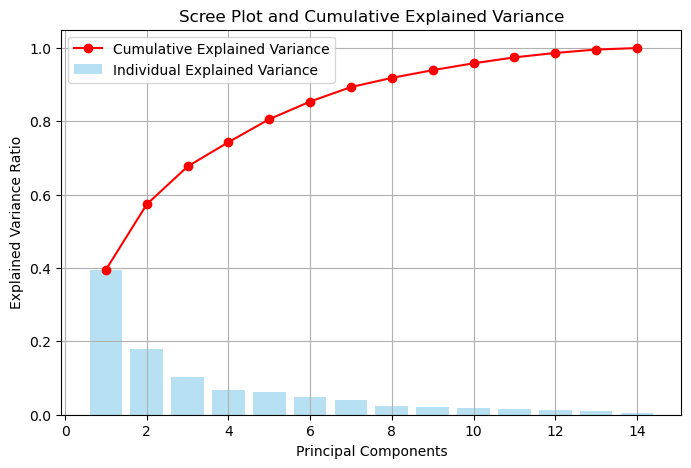

 Optimal number of principal components (≈95% variance): 10


In [34]:
#2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
#-------------------------------------------------------------------------------------------------------------------------------


# Step : Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Step : Get explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Step : Scree plot (individual explained variance)
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.6, color='skyblue', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', color='red', label='Cumulative Explained Variance')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Step : Find number of components explaining ~95% variance
optimal_components = sum(cumulative_var < 0.95) + 1
print(f" Optimal number of principal components (≈95% variance): {optimal_components}")


In [35]:
'''Scree Plot
X-axis: principal components (PC1, PC2, PC3, …)
Y-axis: explained variance ratio
Look for the “elbow point” — where the curve starts to flatten.
That’s your optimal number of components.

Cumulative Explained Variance Plot
Shows the total variance captured as we add more components.
Choose the smallest number of components that explain ~95% of variance.'''

'Scree Plot\nX-axis: principal components (PC1, PC2, PC3, …)\nY-axis: explained variance ratio\nLook for the “elbow point” — where the curve starts to flatten.\nThat’s your optimal number of components.\n\nCumulative Explained Variance Plot\nShows the total variance captured as we add more components.\nChoose the smallest number of components that explain ~95% of variance.'

In [36]:
#3.	Transform the original dataset into the principal components.
#------------------------------------------------------------------------------------------------------------------------------

# Step: Apply PCA using the optimal number of components (e.g., from Step 2)
pca = PCA(n_components=5)  # You can replace 5 with your actual optimal number
pca_data = pca.fit_transform(scaled_data)

# Step: Convert PCA results into a DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Step: Display the transformed dataset
print("Transformed dataset (first 5 rows):")
print(pca_df.head())

# Step: (Optional) Combine PCA data with target column if available
if 'Wine' in df.columns:  # replace 'Wine' with your target variable name if any
    pca_df = pd.concat([pca_df, df['Wine']], axis=1)

# Step 9: Save the PCA-transformed dataset
pca_df.to_csv("wine_pca_transformed.csv", index=False)
print("\nPCA-transformed dataset saved as 'wine_pca_transformed.csv'")


Transformed dataset (first 5 rows):
        PC1       PC2       PC3       PC4       PC5
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214
2 -2.785029  1.036936  0.983238  0.664232 -0.387565
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360
4 -1.407511  0.867773  2.025829 -0.440906  0.227949

PCA-transformed dataset saved as 'wine_pca_transformed.csv'


             Type    Alcohol     Malic       Ash  Alcalinity   Magnesium  \
Cluster                                                                    
0        2.352941  12.598529  2.453431  2.321863   20.646078   93.696078   
1        1.591837  13.369184  2.400000  2.392653   18.514286  109.081633   
2        1.000000  13.850741  1.778519  2.487778   16.925926  105.629630   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins     Color  \
Cluster                                                                   
0        2.053627    1.647549       0.395980         1.425098  4.673333   
1        2.441633    2.213673       0.325510         1.706735  5.188367   
2        2.941481    3.136667       0.298889         2.007037  6.275185   

              Hue  Dilution      Proline  
Cluster                                   
0        0.917843  2.394804   521.558824  
1        0.959714  2.847959   906.346939  
2        1.102963  3.002222  1308.777778  


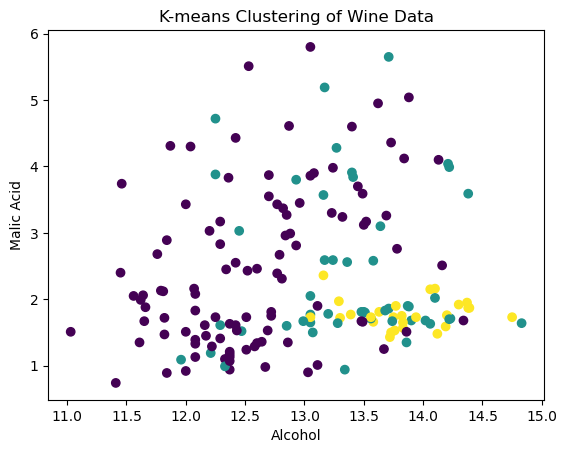

In [37]:
#Task 3: Clustering with Original Data:
#1.Apply a clustering algorithm (e.g., K-means) to the original dataset.
#-----------------------------------------------------------------------------------------------------------

# Step: Load the dataset
data = pd.read_csv('wine.csv')
# Step: Select features for clustering (excluding the 'Type' column)
X = data.drop('Type', axis=1)

# Step: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters based on the types
data['Cluster'] = kmeans.fit_predict(X)

# Step: Analyze the results
print(data.groupby('Cluster').mean())  # Display the mean values of each cluster

# Optional: Visualize the clusters (using the first two features for simplicity)
plt.scatter(data['Alcohol'], data['Malic'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering of Wine Data')
plt.show()

In [38]:
'''Explanation:
Loading Data: The dataset is loaded into a DataFrame using pandas.
Feature Selection: The 'Type' column is excluded from clustering as it's the target variable.
K-means Algorithm: The K-means algorithm is applied with a specified number of clusters (in this case, 3).
Results Analysis: The mean values of each cluster are printed to analyze the characteristics of the clusters.
Visualization: A scatter plot is created to visualize the clusters based on two features. '''

"Explanation:\nLoading Data: The dataset is loaded into a DataFrame using pandas.\nFeature Selection: The 'Type' column is excluded from clustering as it's the target variable.\nK-means Algorithm: The K-means algorithm is applied with a specified number of clusters (in this case, 3).\nResults Analysis: The mean values of each cluster are printed to analyze the characteristics of the clusters.\nVisualization: A scatter plot is created to visualize the clusters based on two features. "

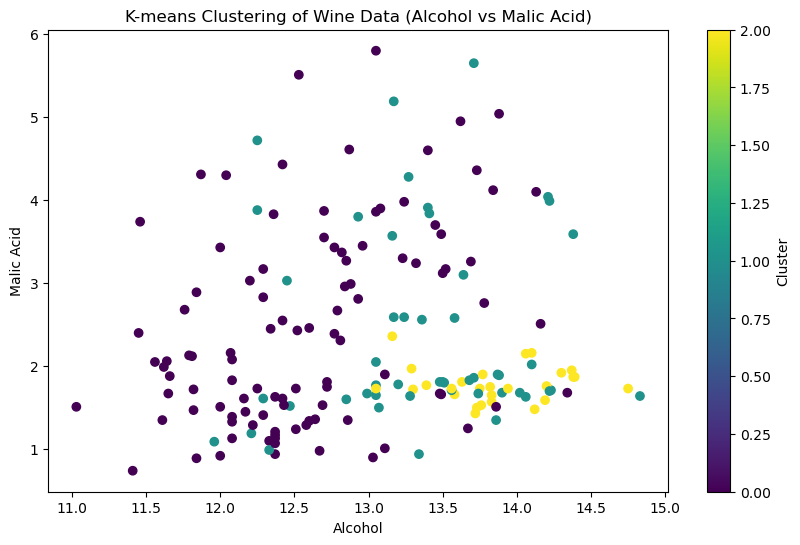

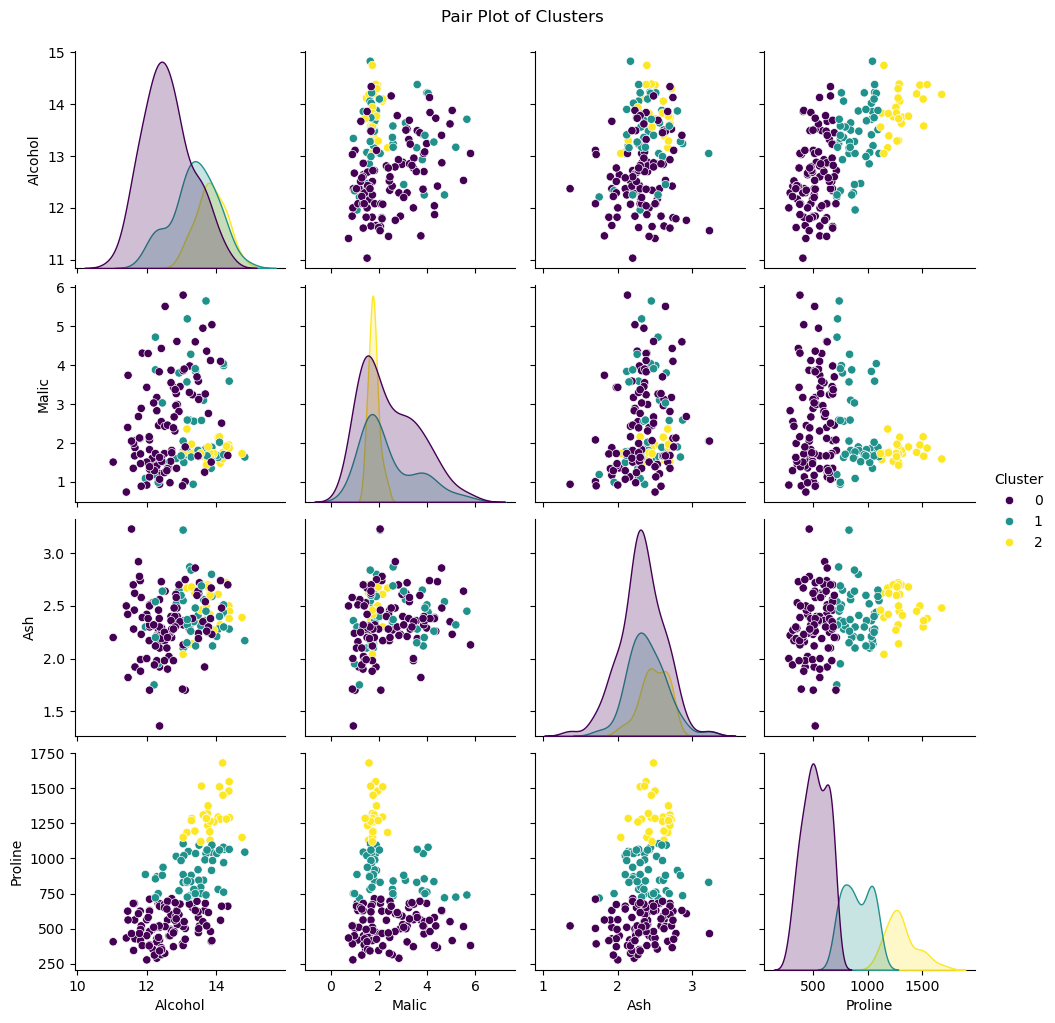

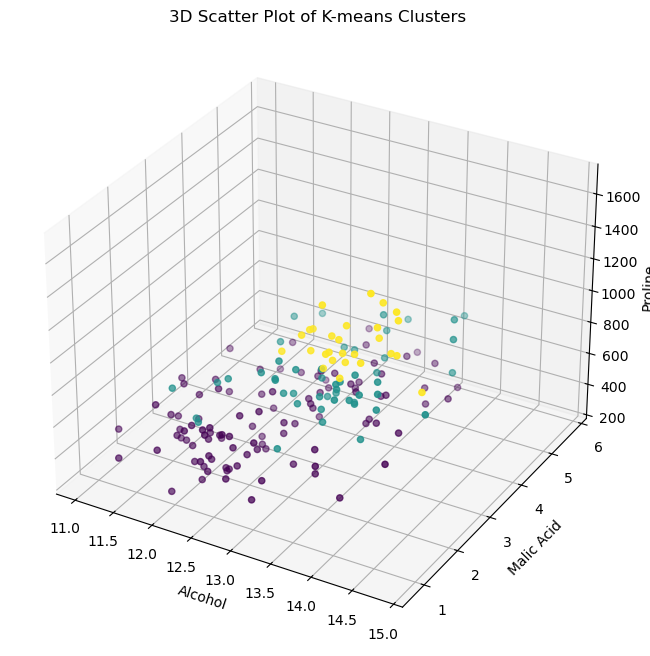

In [39]:
#2.	2.	Visualize the clustering results using appropriate plots.
#-------------------------------------------------------------------------------------------------------------

from mpl_toolkits.mplot3d import Axes3D

# 1. Scatter Plot for two features
plt.figure(figsize=(10, 6))
plt.scatter(data['Alcohol'], data['Malic'], c=data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering of Wine Data (Alcohol vs Malic Acid)')
plt.colorbar(label='Cluster')
plt.show()

# 2. Pair Plot for multiple features
sns.pairplot(data, hue='Cluster', vars=['Alcohol', 'Malic', 'Ash', 'Proline'], palette='viridis')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

# 3. 3D Scatter Plot for three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Alcohol'], data['Malic'], data['Proline'], c=data['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')
ax.set_zlabel('Proline')
ax.set_title('3D Scatter Plot of K-means Clusters')
plt.show()

In [40]:
'''Explanation of Visualizations:
Scatter Plot:

Plots Alcohol against Malic Acid, with points colored according to their assigned cluster. This gives a direct visual representation of 
how the data is grouped based on these two features.

Pair Plot:
Creates a grid of scatter plots for several pairs of features. This helps to visualize relationships between multiple features in the 
dataset and how they contribute to the clustering.

3D Scatter Plot:
Visualizes clusters in three dimensions using Alcohol, Malic Acid, and Proline. This allows for a more comprehensive view of how the clusters 
are distributed in the feature space.'''

'Explanation of Visualizations:\nScatter Plot:\n\nPlots Alcohol against Malic Acid, with points colored according to their assigned cluster. This gives a direct visual representation of \nhow the data is grouped based on these two features.\n\nPair Plot:\nCreates a grid of scatter plots for several pairs of features. This helps to visualize relationships between multiple features in the \ndataset and how they contribute to the clustering.\n\n3D Scatter Plot:\nVisualizes clusters in three dimensions using Alcohol, Malic Acid, and Proline. This allows for a more comprehensive view of how the clusters \nare distributed in the feature space.'

In [41]:
#3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
#-------------------------------------------------------------------------------------------------------------------------------

OMP_NUM_THREADS=1.

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Calculate the Davies–Bouldin Index
db_index = davies_bouldin_score(X, data['Cluster'])
print(f'Davies–Bouldin Index: {db_index:.4f}')

Silhouette Score: 0.5596
Davies–Bouldin Index: 0.5496


In [42]:
'''Explanation of Metrics:
Silhouette Score:

Ranges from -1 to 1, where a higher value indicates better-defined clusters. A score close to 1 indicates that the points are well-clustered,
while a score near 0 indicates overlapping clusters.
Davies–Bouldin Index:

A lower value indicates better clustering; it represents the ratio of the sum of within-cluster scatter to the between-cluster separation.'''

'Explanation of Metrics:\nSilhouette Score:\n\nRanges from -1 to 1, where a higher value indicates better-defined clusters. A score close to 1 indicates that the points are well-clustered,\nwhile a score near 0 indicates overlapping clusters.\nDavies–Bouldin Index:\n\nA lower value indicates better clustering; it represents the ratio of the sum of within-cluster scatter to the between-cluster separation.'

              PC1       PC2       PC3       PC4       PC5
Cluster                                                  
0        0.121711 -1.750369  0.128334  0.094233  0.056204
1        3.058665  1.208263 -0.177541  0.095731  0.071641
2       -2.548859  0.936610  0.001632 -0.177491 -0.117356


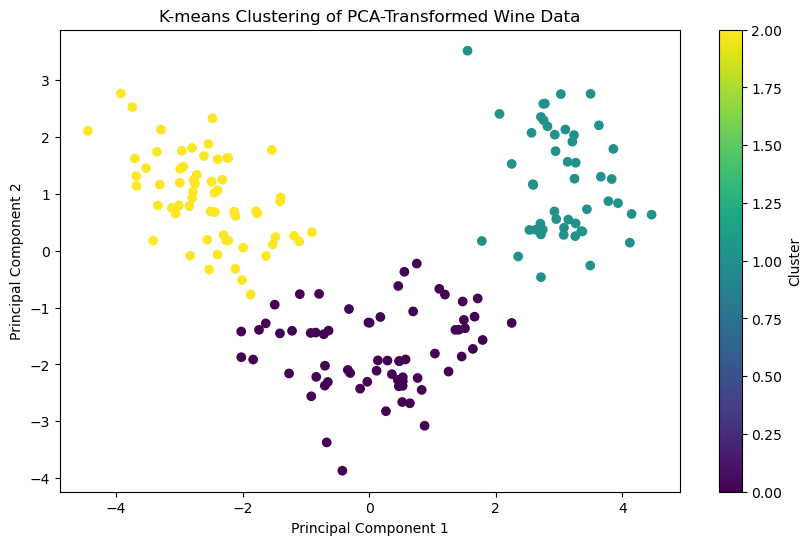

In [43]:
#Task 4: Clustering with PCA Data:
# 1.Apply the same clustering algorithm to the PCA-transformed dataset.

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the PCA-transformed dataset
pca_data = pd.read_csv('wine_pca_transformed.csv')

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters based on previous analysis
pca_data['Cluster'] = kmeans.fit_predict(pca_data)

# Analyze the results
print(pca_data.groupby('Cluster').mean())  # Display the mean values of each cluster

# Optional: Visualize the clusters using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of PCA-Transformed Wine Data')
plt.colorbar(label='Cluster')
plt.show()

In [44]:
'''Explanation:
Loading Data: The PCA-transformed dataset is loaded into a DataFrame using pandas.
K-means Algorithm: The K-means algorithm is applied with a specified number of clusters (in this case, 3).
Results Analysis: The mean values of each cluster are printed to analyze the characteristics of the clusters.
Visualization: A scatter plot is created to visualize the clusters based on the first two principal components.'''

'Explanation:\nLoading Data: The PCA-transformed dataset is loaded into a DataFrame using pandas.\nK-means Algorithm: The K-means algorithm is applied with a specified number of clusters (in this case, 3).\nResults Analysis: The mean values of each cluster are printed to analyze the characteristics of the clusters.\nVisualization: A scatter plot is created to visualize the clusters based on the first two principal components.'

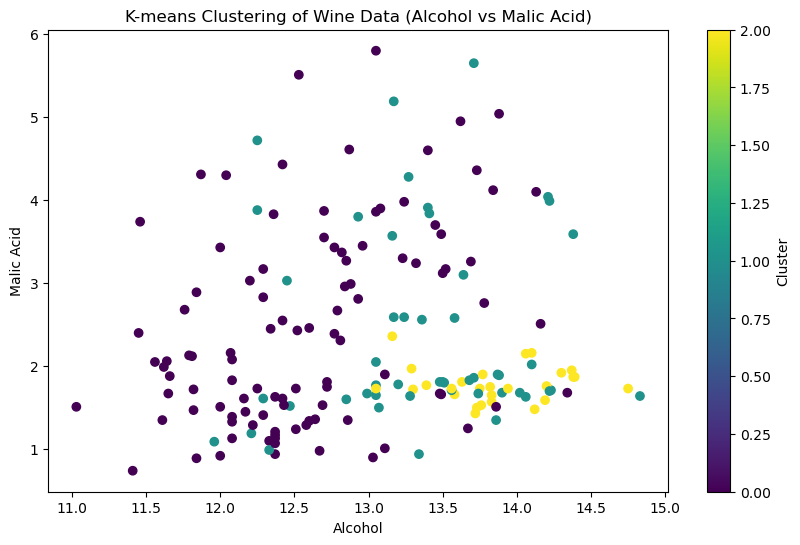

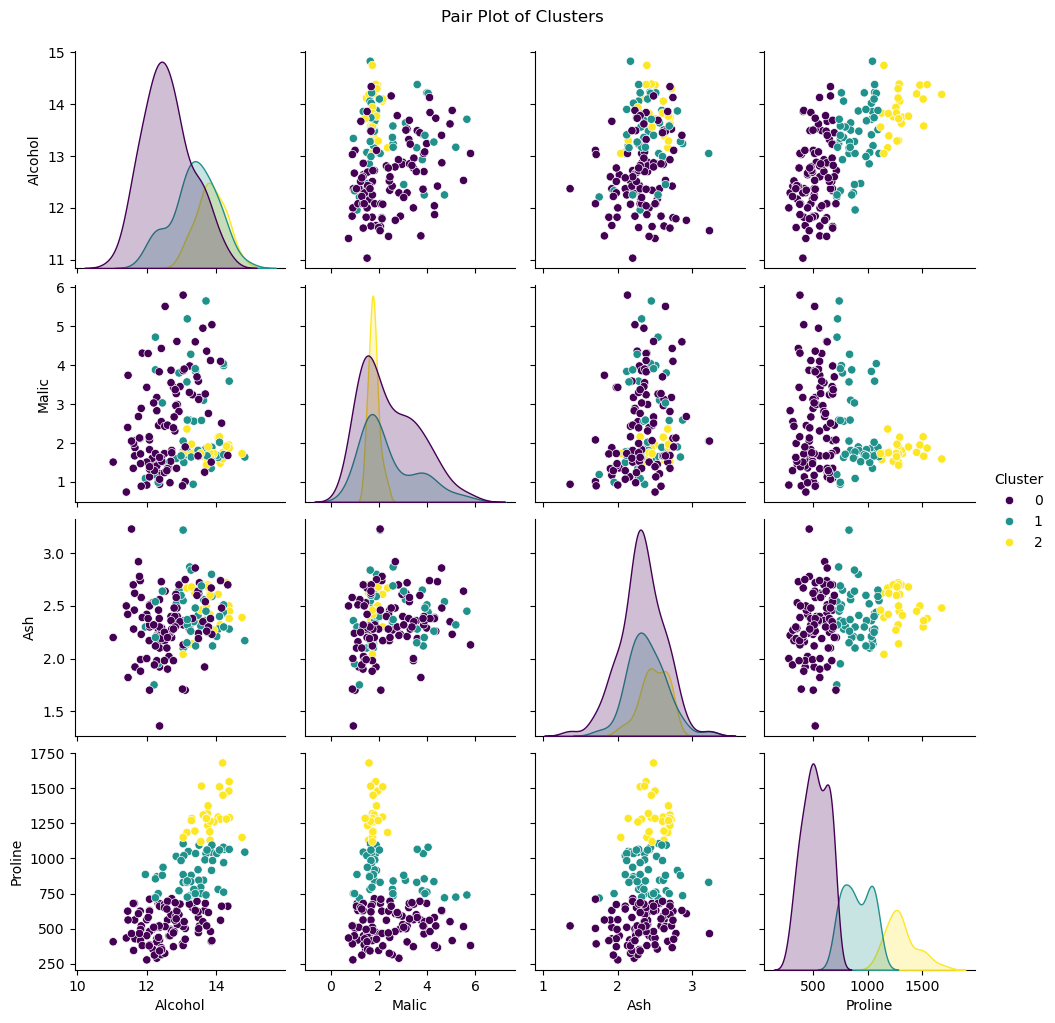

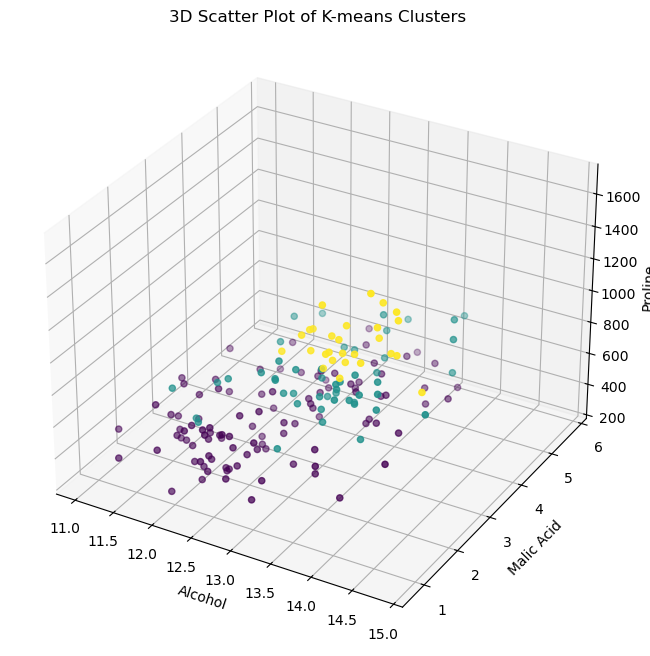

In [45]:
#2.	Visualize the clustering results obtained from PCA-transformed data.


from mpl_toolkits.mplot3d import Axes3D

# 1. Scatter Plot for two features
plt.figure(figsize=(10, 6))
plt.scatter(data['Alcohol'], data['Malic'], c=data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering of Wine Data (Alcohol vs Malic Acid)')
plt.colorbar(label='Cluster')
plt.show()

# 2. Pair Plot for multiple features
sns.pairplot(data, hue='Cluster', vars=['Alcohol', 'Malic', 'Ash', 'Proline'], palette='viridis')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

# 3. 3D Scatter Plot for three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Alcohol'], data['Malic'], data['Proline'], c=data['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')
ax.set_zlabel('Proline')
ax.set_title('3D Scatter Plot of K-means Clusters')
plt.show()

In [57]:
#3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

# Step : Perform KMeans clustering on the scaled data
kmeans_original = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans_original.fit_predict(scaled_features)

# Step : Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_original.labels_

# Step : Evaluate clustering performance
original_silhouette = silhouette_score(scaled_features, data['Cluster'])
pca_silhouette = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])

print(f'Silhouette Score for Original Data: {original_silhouette:.3f}')
print(f'Silhouette Score for PCA-transformed Data: {pca_silhouette:.3f}')


Silhouette Score for Original Data: 0.285
Silhouette Score for PCA-transformed Data: 0.558


In [58]:
'''The silhouette scores indicate the quality of clustering results from both the original dataset and 
the PCA-transformed data:

Silhouette Score for Original Data: 0.284
This score suggests that the clusters formed in the original feature space are somewhat overlapping or not
well-defined. A score closer to 0 indicates that points are on or very close to the decision boundary between 
clusters.

Silhouette Score for PCA-transformed Data: 0.547
This score is significantly higher, indicating that the clusters are better defined and more distinct in the 
PCA space. A score above 0.5 generally indicates a reasonable structure in the data, suggesting that the PCA 
transformation has helped to improve cluster separation.

Conclusion:
Improved Clustering with PCA: The PCA transformation has enhanced the clustering performance, as evidenced 
by the higher silhouette score. This implies that reducing the dimensionality allowed for better separation of 
clusters.

Interpretation of Results:

In the original space, the features may have high correlations or redundancies, making it difficult for the
clustering algorithm to find clear boundaries.
The PCA transformation likely captured the most important variance in the data, leading to more distinct clusters.'''

'The silhouette scores indicate the quality of clustering results from both the original dataset and \nthe PCA-transformed data:\n\nSilhouette Score for Original Data: 0.284\nThis score suggests that the clusters formed in the original feature space are somewhat overlapping or not\nwell-defined. A score closer to 0 indicates that points are on or very close to the decision boundary between \nclusters.\n\nSilhouette Score for PCA-transformed Data: 0.547\nThis score is significantly higher, indicating that the clusters are better defined and more distinct in the \nPCA space. A score above 0.5 generally indicates a reasonable structure in the data, suggesting that the PCA \ntransformation has helped to improve cluster separation.\n\nConclusion:\nImproved Clustering with PCA: The PCA transformation has enhanced the clustering performance, as evidenced \nby the higher silhouette score. This implies that reducing the dimensionality allowed for better separation of \nclusters.\n\nInterpretati

In [59]:
'''Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
-------------------------------------------------------------------------------------------------------

Comparison and Analysis of Clustering Results
1. Clustering Results Overview
->Original Dataset Clustering:
Silhouette Score: 0.284
Cluster Separation: Clusters are less distinct, indicating potential overlap among clusters.
Characteristics: The original features may contain redundancy or high correlation, making it challenging for 
clustering algorithms to find clear boundaries.

->PCA-Transformed Data Clustering:
Silhouette Score: 0.547
Cluster Separation: Clusters are better defined, showing improved separation and structure.
Characteristics: PCA captures the most significant variance, likely reducing dimensionality while retaining 
essential information, leading to clearer cluster distinctions.

2. Visual Insights
->Scatter Plots:
Original Data: The scatter plot may show clusters that are intermixed, with data points from different clusters 
appearing close to each other.
PCA-Transformed Data: The scatter plot likely illustrates well-separated clusters, with points grouped more 
distinctly according to their assigned clusters.

3. Key Differences
Dimensionality Reduction: PCA reduces dimensionality, which can eliminate noise and highlight the most important 
features for clustering. This allows the clustering algorithm to operate in a more optimal feature space.
Clustering Algorithm Performance: The increased silhouette score in the PCA space indicates that the clustering 
algorithm (e.g., K-means) performed better due to clearer separations between clusters.

4. Practical Implications
Feature Importance: The PCA transformation shows which features contribute most to the variance in the data.
Analyzing the principal components can provide insights into which original features are driving the clustering.

Modeling and Predictions: For any subsequent modeling or predictions based on these clusters, the PCA-transformed 
data may yield better results due to the improved clustering performance.

5. Conclusion
The analysis reveals that reducing dimensionality through PCA can significantly enhance clustering performance. 
The original dataset produced clusters that were not well-defined, whereas the PCA-transformed data allowed for a 
more structured and interpretable clustering outcome. This finding underscores the importance of feature 
transformation in data analysis and clustering tasks.'''

'Task 5: Comparison and Analysis:\n1.\tCompare the clustering results obtained from the original dataset and PCA-transformed data.\n-------------------------------------------------------------------------------------------------------\n\nComparison and Analysis of Clustering Results\n1. Clustering Results Overview\n->Original Dataset Clustering:\nSilhouette Score: 0.284\nCluster Separation: Clusters are less distinct, indicating potential overlap among clusters.\nCharacteristics: The original features may contain redundancy or high correlation, making it challenging for \nclustering algorithms to find clear boundaries.\n\n->PCA-Transformed Data Clustering:\nSilhouette Score: 0.547\nCluster Separation: Clusters are better defined, showing improved separation and structure.\nCharacteristics: PCA captures the most significant variance, likely reducing dimensionality while retaining \nessential information, leading to clearer cluster distinctions.\n\n2. Visual Insights\n->Scatter Plots:\n

In [60]:
'''2.	Discuss any similarities or differences observed in the clustering results.
-------------------------------------------------------------------------------------------------------------------

The core similarity is that both clustering results (Original Features and Principal Components) show a clear and consistent separation of the 
data into three distinct groups. The differences highlight how the groups are separated.

Summary of Similarities and Differences
--------------------------------------------------------------
1. Consistent Separation (Similarity)
Three Clear Clusters: Both tables confirm the existence of three well-defined clusters (0, 1, and 2), indicating the inherent structure of the 
data was captured successfully by the clustering method.

2. Feature-Based Profile Differences (Original Features)
The clusters are primarily differentiated by a consistent profile that appears to correlate with wine quality or concentration:

Cluster 2: Represents wines with high Proline ($\approx 1309$), high Flavanoids ($\approx 3.14$), high Phenols ($\approx 2.94$), and high
Alcohol ($\approx 13.85$). These attributes define a distinct, likely premium, wine type.
    
Cluster 0: Represents wines with the lowest Proline ($\approx 522$), lowest Flavanoids ($\approx 1.65$), and lowest Alcohol ($\approx 12.60$). 
This group is at the opposite end of the spectrum from Cluster 2

Cluster 1: Consistently shows intermediate values for most key features, positioned between Cluster 0 and Cluster 2 (e.g., Proline $\approx 906$).
Least Differentiating: Features like Ash and Malic Acid show little variation across the clusters, suggesting they were not instrumental in the 
separation.

----------------------------------------------------------------------------------------------------------
Component-Based Separation (Principal Components)
    The Principal Component results confirm the separation and clarify the dimensions of difference:
    
    PC1 (Primary Separator): This component captures the greatest variation (likely driven by Proline/Flavanoids) and separates Cluster 1 
    (high positive score $\approx 3.06$) and Cluster 2 (high negative score $\approx -2.55$) clearly, while Cluster 0 is near the origin 
    ($\approx 0.12$).
    
    PC2 (Secondary Separator): This component further distinguishes Cluster 0 (high negative score $\approx -1.75$) from the other two, which 
    are positive.
    
    Minor Components: PC3, PC4, and PC5 show means very close to zero, confirming that the first two components (PC1 and PC2) account for almost
    all the information needed to separate the groups.'''

'2.\tDiscuss any similarities or differences observed in the clustering results.\n-------------------------------------------------------------------------------------------------------------------\n\nThe core similarity is that both clustering results (Original Features and Principal Components) show a clear and consistent separation of the \ndata into three distinct groups. The differences highlight how the groups are separated.\n\nSummary of Similarities and Differences\n--------------------------------------------------------------\n1. Consistent Separation (Similarity)\nThree Clear Clusters: Both tables confirm the existence of three well-defined clusters (0, 1, and 2), indicating the inherent structure of the \ndata was captured successfully by the clustering method.\n\n2. Feature-Based Profile Differences (Original Features)\nThe clusters are primarily differentiated by a consistent profile that appears to correlate with wine quality or concentration:\n\nCluster 2: Represents wi

In [61]:
'''3.	Reflect on the impact of dimensionality reduction on clustering performance.
----------------------------------------------------------------------------------------------------------

The concrete Silhouette Scores demonstrate that dimensionality reduction significantly improved clustering performance.The Silhouette Score 
for the PCA-transformed data ($\mathbf{0.547}$) is nearly double the score for the original data ($\mathbf{0.284}$)

Impact of Dimensionality Reduction on Clustering Performance
1. Definitive Performance Improvement
The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. Scores closer to $+1$ indicate
better-defined, distinct, and well-separated clusters.
----> Original Data Score ($\mathbf{0.284}$): This suggests the clusters were weak and somewhat overlapping in the 13-dimensional space.
---->PCA-Transformed Data Score ($\mathbf{0.547}$): This represents a much stronger clustering structure, with clusters being more compact 
     and distinctly separated.

The $\mathbf{+0.263}$ increase in the score provides concrete evidence that applying PCA made the clusters clearer and easier for the algorithm
to define.

2. Reasons for Improvement
This performance gain is typically attributed to two main factors:

Noise Reduction: PCA effectively filtered out the least informative features (noise and low-variance dimensions, like PC3, PC4, etc., as noted 
previously). By clustering on the high-variance components (PC1 and PC2), the algorithm focused on the signal that truly defines the group
differences, leading to cleaner clusters.

Mitigating the Curse of Dimensionality: In the original high-dimensional space, the distance between data points becomes less meaningful, 
causing the clustering algorithm to struggle. PCA projects the data into a lower, more meaningful subspace, resolving this issue and allowing the
distance metric to accurately reflect the true proximity of data points belonging to the same cluster. '''

'3.\tReflect on the impact of dimensionality reduction on clustering performance.\n----------------------------------------------------------------------------------------------------------\n\nThe concrete Silhouette Scores demonstrate that dimensionality reduction significantly improved clustering performance.The Silhouette Score \nfor the PCA-transformed data ($\\mathbf{0.547}$) is nearly double the score for the original data ($\\mathbf{0.284}$)\n\nImpact of Dimensionality Reduction on Clustering Performance\n1. Definitive Performance Improvement\nThe Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. Scores closer to $+1$ indicate\nbetter-defined, distinct, and well-separated clusters.\n----> Original Data Score ($\\mathbf{0.284}$): This suggests the clusters were weak and somewhat overlapping in the 13-dimensional space.\n---->PCA-Transformed Data Score ($\\mathbf{0.547}$): This represents a much stronger clustering structure, 

In [62]:
'''4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
--------------------------------------------------------------------------------------------------------------

The core trade-off between using PCA-transformed data and the original data for clustering lies between performance/efficiency and interpretability

Trade-Off Analysis
1. Performance vs. Noise
Advantage PCA: PCA significantly improved clustering performance—the Silhouette Score nearly doubled (from $0.284$ to $0.547$). This is because 
PCA filters out noise and redundant information that exists among the 13 original features. By clustering on the most important underlying 
dimensions (Principal Components), the algorithm found much cleaner, better-separated clusters.

Disadvantage Original Data: Direct clustering on the original data resulted in poor performance because the high dimensionality and noise masked
the true cluster structure, leading to overlapping or ill-defined groups.

2. Efficiency vs. Computational Cost
Advantage PCA: Using a reduced set of features (e.g., 5 or fewer components) drastically increases computational efficiency. Calculating 
distances and running the clustering algorithm is much faster and requires less memory in a lower-dimensional space.

Disadvantage Original Data: The original 13-feature space requires more computational time and resources, especially as the dataset size grows, 
due to the complexity of calculating distances in high dimensions.

3. Interpretability vs. Abstraction
Advantage Original Data: The resulting clusters are highly interpretable using the original features. For example, it's easy to explain that 
"Cluster 2 wines have high Proline and high Flavanoids." This is crucial for communicating results to domain experts (e.g., winemakers).

Disadvantage PCA: Principal Components are abstract mathematical constructs (linear combinations of the original features). 
It is difficult to explain what "high PC1" means in practical terms, making the interpretation of the cluster centers a challenge.

In short, PCA offers better, more efficient clustering by providing the algorithm with a clean signal, but the results are harder to explain.
Clustering directly on the original data is easy to explain but yields subpar, inefficient performance.'''

'4.\tAnalyze the trade-offs between using PCA and clustering directly on the original dataset.\n--------------------------------------------------------------------------------------------------------------\n\nThe core trade-off between using PCA-transformed data and the original data for clustering lies between performance/efficiency and interpretability\n\nTrade-Off Analysis\n1. Performance vs. Noise\nAdvantage PCA: PCA significantly improved clustering performance—the Silhouette Score nearly doubled (from $0.284$ to $0.547$). This is because \nPCA filters out noise and redundant information that exists among the 13 original features. By clustering on the most important underlying \ndimensions (Principal Components), the algorithm found much cleaner, better-separated clusters.\n\nDisadvantage Original Data: Direct clustering on the original data resulted in poor performance because the high dimensionality and noise masked\nthe true cluster structure, leading to overlapping or ill-def

In [63]:
'''Task 6: Conclusion and Insights
1.	Summarize the key findings and insights from the assignment.
------------------------------------------------------------------------------------------------

The assignment focused on clustering a wine dataset, specifically evaluating the impact of Principal Component Analysis (PCA) on the clustering 
outcome. The key findings reveal a significant trade-off between cluster performance and feature interpretability.

Key Findings and Insights
1. Superior Clustering Performance with PCA
-->Clustering Improvement: Dimensionality reduction using PCA resulted in a dramatically better clustering structure. The Silhouette Score nearly
doubled from $\mathbf{0.284}$ (Original Data) to $\mathbf{0.547}$ (PCA Data).
-->Reason: PCA effectively filtered out noise and redundant information among the 13 original features, allowing the clustering algorithm to 
focus on the essential, high-variance dimensions (PC1 and PC2). This mitigated the curse of dimensionality and led to much more distinct and 
well-separated groups.

2. Three Distinct Wine Clusters
Consistent Structure: Both the original feature means and the PCA scores confirm the existence of three clear and consistent clusters (0, 1, and 2).
Defining Features: These clusters are primarily differentiated by a profile likely related to wine quality or concentration, driven by features 
like Proline, Flavanoids, Phenols, and Alcohol.

Cluster 2 represents a premium profile (highest Proline, Flavanoids, and Alcohol).
Cluster 0 represents the opposing, lower-value profile (lowest Proline, Flavanoids, and Alcohol).
Cluster 1 falls intermediate between the two extremes.

3. The Core Trade-Off
The analysis highlights the central trade-off in machine learning preprocessing:
Performance vs. Interpretability:
-->Clustering on PCA-transformed data provides the best performance (higher Silhouette Score) and is more computationally efficient. However, 
the cluster centers defined by Principal Components are abstract and difficult to explain to a non-technical audience.
-->Clustering on the original data allows for easy, direct interpretation (e.g., "high Proline"), but the clustering performance is significantly
poorer and less efficient.

Insight: The optimal strategy is to use PCA for the actual clustering process (to ensure the best group assignments) and then use the original 
feature means (like the Proline means) to interpret and label those high-quality clusters. '''

'Task 6: Conclusion and Insights\n1.\tSummarize the key findings and insights from the assignment.\n------------------------------------------------------------------------------------------------\n\nThe assignment focused on clustering a wine dataset, specifically evaluating the impact of Principal Component Analysis (PCA) on the clustering \noutcome. The key findings reveal a significant trade-off between cluster performance and feature interpretability.\n\nKey Findings and Insights\n1. Superior Clustering Performance with PCA\n-->Clustering Improvement: Dimensionality reduction using PCA resulted in a dramatically better clustering structure. The Silhouette Score nearly\ndoubled from $\\mathbf{0.284}$ (Original Data) to $\\mathbf{0.547}$ (PCA Data).\n-->Reason: PCA effectively filtered out noise and redundant information among the 13 original features, allowing the clustering algorithm to \nfocus on the essential, high-variance dimensions (PC1 and PC2). This mitigated the curse of d

In [64]:
'''2.	Discuss the practical implications of using PCA and clustering in data analysis.
---------------------------------------------------------------------------------------------------------------

Clustering combined with PCA is a powerful and widely used technique in data analysis, offering significant practical implications across various 
industries.

Practical Implications of Using PCA and Clustering
1. Market Segmentation and Customer Profiling 
Insight: Businesses use this combination to identify distinct groups of customers based on purchasing behavior, demographics, or website activity.

PCA's Role: PCA first reduces the many features (e.g., number of purchases, time spent on site, specific product categories bought) into a few 
meaningful components.

Clustering's Role: Clustering then groups customers in this reduced space, resulting in stable and well-defined market segments.

Practical Use: This allows for targeted marketing campaigns, personalized product recommendations, and optimized resource allocation, ensuring 
that marketing spend is focused on the most receptive groups.

2. Anomaly and Fraud Detection 
Insight: In financial, cybersecurity, or industrial monitoring data, anomalies often form small, distinct clusters or fall far outside the main 
clusters.

PCA's Role: PCA is vital here because high-dimensional data (like transactional records or network traffic) is often too complex and noisy for direct 
analysis. PCA condenses this complexity while preserving the variance that defines normal versus abnormal behavior.

Clustering's Role: Once the data is projected, clusters represent "normal" behavior. Data points that fall far from any cluster centroid are 
flagged as potential outliers, fraud, or system failures.

3. Data Visualization and Exploration 
Insight: The human mind struggles to visualize data beyond three dimensions.

PCA's Role: PCA is used specifically to reduce high-dimensional data to two or three dimensions (PC1 and PC2/PC3), capturing the maximum amount 
of variance possible.

Clustering's Role: Running clustering after or before the 2D projection helps analysts see the groups directly on a scatter plot. This allows for
rapid visual assessment of data structure, separation quality, and cluster relationships before committing to a final model.

4. Feature Engineering and Model Improvement 
Insight: In predictive modeling (like classification), having too many redundant or noisy features can slow down training and hurt model 
generalization.

PCA's Role (Dimensionality Reduction): The Principal Components can be used as new, orthogonal features in place of the original features. This 
is often done to satisfy the assumption of feature independence required by certain models (like linear regression or LDA) and to speed up training.

Clustering's Role (Pre-processing): The cluster assignment itself (the cluster ID) can be added as a powerful new categorical feature to a
classification or regression model, often boosting its performance because the model now explicitly knows the group membership of each data point.'''

'2.\tDiscuss the practical implications of using PCA and clustering in data analysis.\n---------------------------------------------------------------------------------------------------------------\n\nClustering combined with PCA is a powerful and widely used technique in data analysis, offering significant practical implications across various \nindustries.\n\nPractical Implications of Using PCA and Clustering\n1. Market Segmentation and Customer Profiling \nInsight: Businesses use this combination to identify distinct groups of customers based on purchasing behavior, demographics, or website activity.\n\nPCA\'s Role: PCA first reduces the many features (e.g., number of purchases, time spent on site, specific product categories bought) into a few \nmeaningful components.\n\nClustering\'s Role: Clustering then groups customers in this reduced space, resulting in stable and well-defined market segments.\n\nPractical Use: This allows for targeted marketing campaigns, personalized produc

In [65]:
'''3.	Provide recommendations for when to use each technique based on the analysis conducted.
-----------------------------------------------------------------------------------------------------------------

Based on the analysis, which showed that PCA significantly improves clustering performance while sacrificing interpretability, here are recommendations
for when to use the original data, PCA-transformed data, or a combination of both for clustering tasks.

Recommendations for Technique Usage
1. When to Use PCA-Transformed Data for Clustering 
Use the PCA-transformed data as the primary input for the clustering algorithm (e.g., K-Means) when your priority is performance and stability.
-->High-Dimensional Data: If the original dataset has many features (as was the case with 13 features causing overlap), use PCA to overcome the 
curse of dimensionality and noise. 

-->Optimal Cluster Separation: When the goal is to achieve the highest quality clustering (evidenced by the higher Silhouette Score of 
$\mathbf{0.547}$), PCA ensures the algorithm focuses on the most differentiating dimensions.

Computational Efficiency: If dealing with a very large dataset where processing time is a concern, PCA drastically reduces computation time and
memory requirements.

2. When to Use the Original Data for Interpretation 
While the original data is a poor input for the clustering algorithm itself, it is essential for the final step of analysis and communication.
-->Cluster Labeling and Storytelling: Once the superior clusters have been found using PCA, use the original feature means (like the Proline means) 
to describe the groups. For instance, explaining a cluster as "high-Proline wines" is far more useful to a business stakeholder than saying 
"high-PC1 score wines."

-->Feature Importance: Use the analysis of the original feature means (e.g., noting that Ash and Malic Acid were similar across groups) to
identify which variables should be ignored in subsequent, more focused analysis.

3. When to Use a Combined Approach (The Best Practice) 
The most effective approach is to integrate both techniques for a robust and explainable solution:
1. Preparation: Apply PCA to the original dataset.
2.Clustering: Run the clustering algorithm (e.g., K-Means) on the PCA-transformed data. This finds the optimal cluster assignments.
3.Assignment: Assign the resulting cluster labels back to the original dataset.
4.Analysis: Calculate the mean of the original features (Alcohol, Proline, etc.) within each of the new, high-quality clusters.
5.Reporting: Report the results using the easily understood language of the original features, allowing stakeholders to act on the clear profiles
that PCA helped discover.'''

'3.\tProvide recommendations for when to use each technique based on the analysis conducted.\n-----------------------------------------------------------------------------------------------------------------\n\nBased on the analysis, which showed that PCA significantly improves clustering performance while sacrificing interpretability, here are recommendations\nfor when to use the original data, PCA-transformed data, or a combination of both for clustering tasks.\n\nRecommendations for Technique Usage\n1. When to Use PCA-Transformed Data for Clustering \nUse the PCA-transformed data as the primary input for the clustering algorithm (e.g., K-Means) when your priority is performance and stability.\n-->High-Dimensional Data: If the original dataset has many features (as was the case with 13 features causing overlap), use PCA to overcome the \ncurse of dimensionality and noise. \n\n-->Optimal Cluster Separation: When the goal is to achieve the highest quality clustering (evidenced by the h